<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#imports_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Train model](#train_model) <br>
    7.1. [Decision tree](#decision_tree) <br>
    7.2. [Random forest](#random_forest) <br>
    7.3. [Gradient booster](#gradient_booster)
8. [Tuning](#tune) <br>
    8.1. [Finding best parameters](#find_best_p)

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Import data <a id='imports_data'></a>
[Back to top](#table_of_contents)

In [47]:
games_initial_df = pd.read_csv(r'C:\Users\danie\Machine_Learning\datasets\video_games_sales.csv')
games_initial_df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [48]:
games_initial_df.isna().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

array([[<Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'na_sales'}>],
       [<Axes: title={'center': 'eu_sales'}>,
        <Axes: title={'center': 'jp_sales'}>,
        <Axes: title={'center': 'other_sales'}>],
       [<Axes: title={'center': 'global_sales'}>, <Axes: >, <Axes: >]],
      dtype=object)

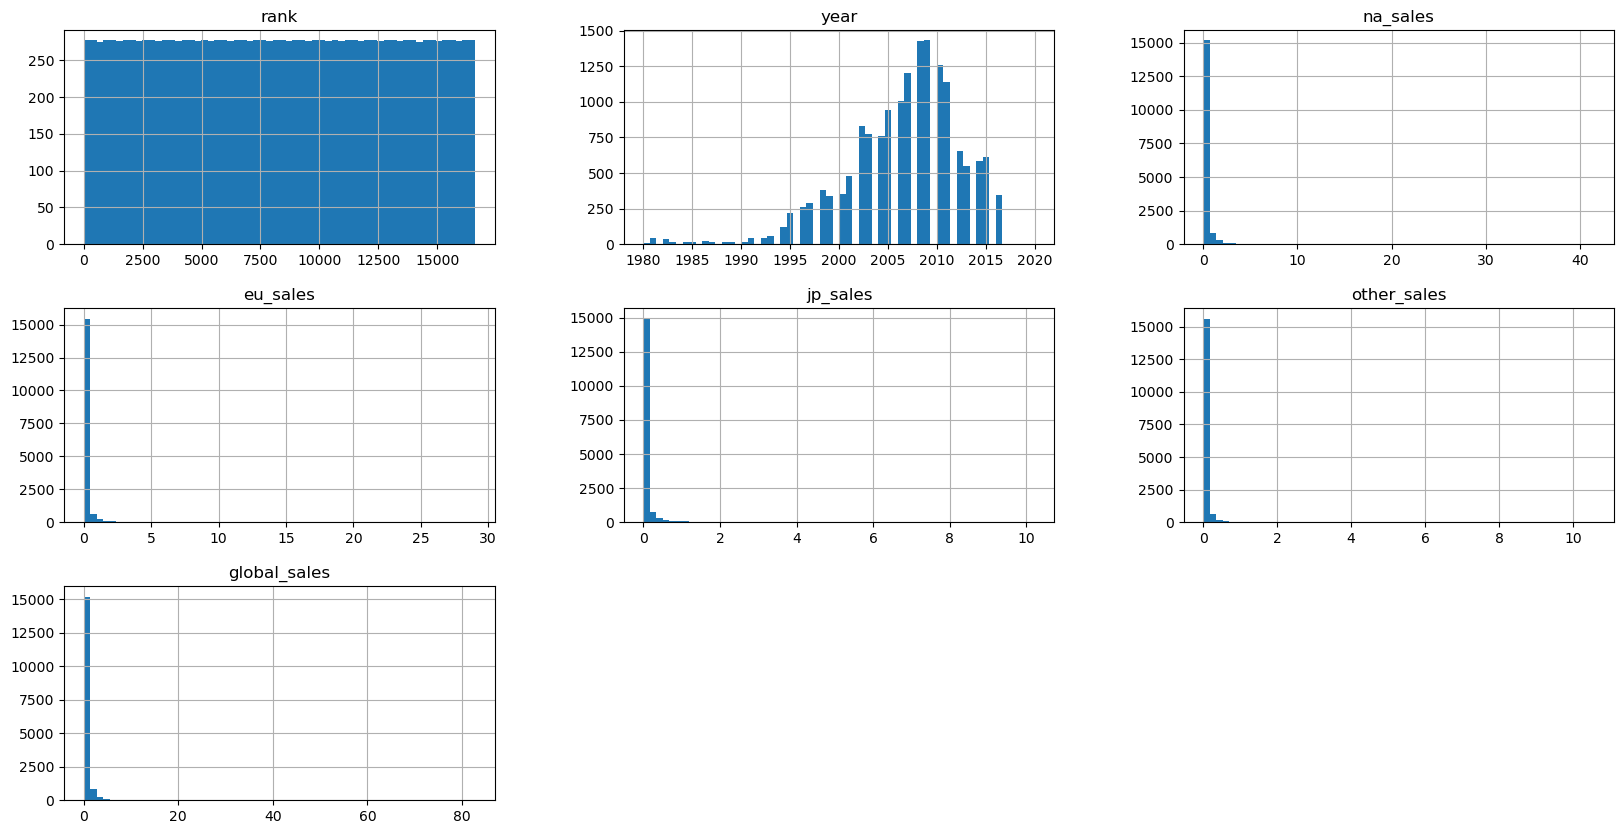

In [49]:
games_initial_df.hist(bins=60, figsize=(20,10))

In [50]:
games_initial_df[games_initial_df['year'].isna()]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


**Everything seems logical**

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

**For some Nan values in the year column the year is inside the game name**

In [51]:
import re

def extract_year(text):
    match = re.search(r'\b(19|20)\d{2}\b', str(text))
    if match:
        return int(match.group())
    return None

games_initial_df['extracted_year'] = games_initial_df[games_initial_df['year'].isna()]['name'].apply(extract_year)
games_initial_df['year'] = games_initial_df['year'].fillna(games_initial_df['extracted_year'])
print(games_initial_df.isna().sum())
print(games_initial_df.columns)

rank                  0
name                  0
platform              0
year                254
genre                 0
publisher            58
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
extracted_year    16581
dtype: int64
Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'extracted_year'],
      dtype='object')


**Removing rows with nan values in the year column and can't be assigned**

In [52]:
cleaned_games_df = games_initial_df[['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales']]
cleaned_games_df = cleaned_games_df[cleaned_games_df['year'].notna()]

**Assigning "Unknown" to every nan value in publisher column**

In [54]:
cleaned_games_df.loc[cleaned_games_df['publisher'].isna(), 'publisher'] = 'Unknown'
cleaned_games_df.isna().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [ ]:
prepared_games_df = cleaned_games_df.copy()

from sklearn.feature_extraction.text import TfidfVectorizer

#Text vectorization
vectorizer = TfidfVectorizer()

  (0, 8429)	0.7381783986130072
  (0, 7270)	0.674605552764826
  (1, 7455)	0.4685243231745903
  (1, 4718)	0.555191162540907
  (1, 1048)	0.6872028315062941
  (2, 8429)	0.5733611607402461
  (2, 4718)	0.5081928573432245
  (2, 4025)	0.6426484257351966
  (3, 8429)	0.5514791112682218
  (3, 7270)	0.503985041277796
  (3, 6296)	0.6647329298319968
  (4, 5884)	0.8294129011017211
  (4, 6225)	0.3793927620648168
  (4, 913)	0.4100431338028427
  (5, 7697)	1.0
  (6, 7455)	0.4033184449753405
  (6, 4718)	0.4779236109298199
  (6, 1048)	0.5915628360717748
  (6, 5269)	0.5088974995391446
  (7, 8429)	0.6922031775761037
  (7, 5856)	0.7217026818251024
  (8, 8429)	0.4746106811568258
  (8, 7455)	0.3549992139293977
  (8, 4718)	0.42066636999148105
  (8, 1048)	0.5206911422267465
  :	:
  (16337, 5133)	0.5914690906907514
  (16337, 6315)	0.6476732457611362
  (16338, 5873)	1.0
  (16339, 3629)	0.29735447272606635
  (16339, 1598)	0.42446075435265
  (16339, 1215)	0.45259817660562324
  (16339, 8485)	0.5131122080488084
  (1633

In [67]:
from sklearn.model_selection import train_test_split

input_features = ['platform', 'year', 'genre', 'publisher', 'na_sales']
target_feature = 'global_sales'

X_bench = prepared_games_df[input_features]
y_bench = prepared_games_df[target_feature]

#One-hot coding
X_bench = pd.get_dummies(X_bench)

X_train, X_test, y_train, y_test = train_test_split(X_bench, y_bench, test_size=0.2, random_state=42)

         year  na_sales  platform_2600  platform_3DO  platform_3DS  \
15854  2011.0      0.00          False         False         False   
6598   2005.0      0.00          False         False         False   
4116   2008.0      0.40          False         False         False   
13878  2005.0      0.02          False         False         False   
3366   1998.0      0.00          False         False         False   
...       ...       ...            ...           ...           ...   
13617  2011.0      0.00          False         False          True   
5458   2009.0      0.00          False         False         False   
867    1986.0      1.13          False         False         False   
16037  2015.0      0.00          False         False         False   
7375   2010.0      0.17          False         False         False   

       platform_DC  platform_DS  platform_GB  platform_GBA  platform_GC  ...  \
15854        False         True        False         False        False  ...   

In [70]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [71]:
from sklearn.metrics import r2_score

y_pred = decision_tree.predict(X_test)
r2_score(y_test, y_pred)

0.7891521696583409

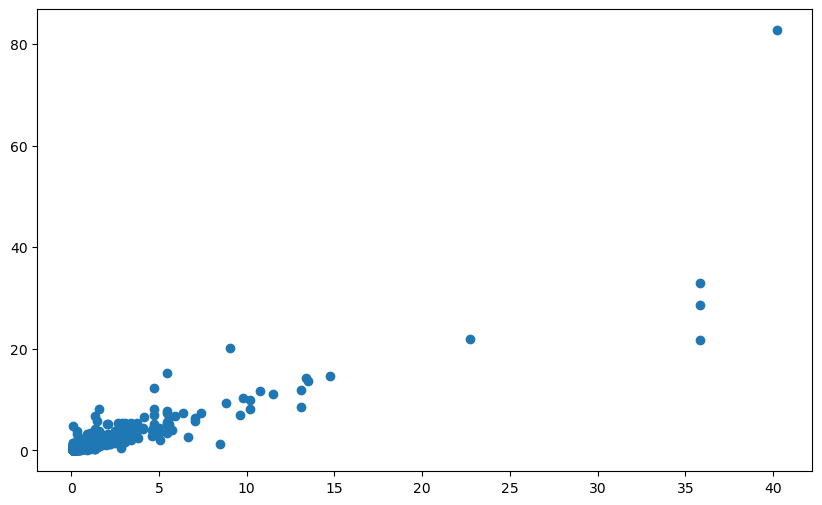

In [72]:
figure, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_pred, y_test)